#  Vaga exploración en búsqueda de algo qué hacer.

In [173]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [178]:
#!ls kaggle-survey-2018/
!ls
data = pd.read_csv('kaggle-survey-2018/multipleChoiceResponses.csv',delimiter=',')
!cat kaggle-survey-2018/SurveySchema.csv |grep -v Q1 > surveyModified
schema = pd.read_csv('surveyModified',delimiter=',').dropna()
names = schema.copy().keys()
#print(len(data))
#data['Q1']
keys = data.copy().keys()
data = data.drop(0)

Kaggle_notebook.ipynb  kaggle-survey-2018  README.md  surveyModified


/home/clarkguilty/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


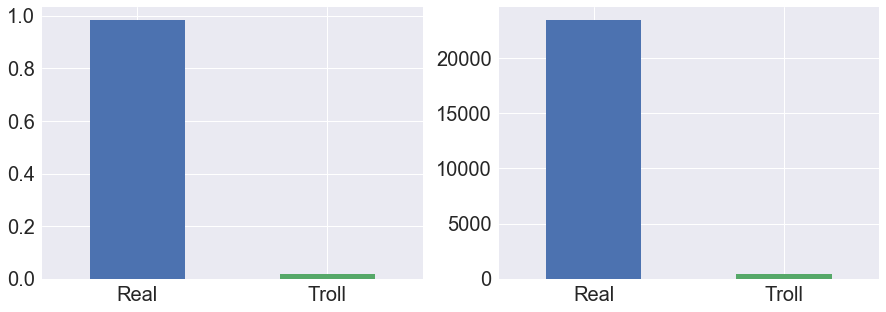

In [179]:
tiempos = data[keys[0]].values
ii = np.float64(tiempos) > 60
trolls = tiempos.copy()
trolls[ii] = "Real"
trolls[~ii] = "Troll"
plt.figure(figsize=(15,5))
plt.suptitle("")
plt.subplot(1,2,1)
pd.Series(trolls).value_counts(normalize=True).plot("bar",rot = 0,fontsize=20)
plt.subplot(1,2,2)
pd.Series(trolls).value_counts(normalize=False).plot("bar",rot = 0,fontsize=20)

Text(0.5,0.98,'Responientes por país')

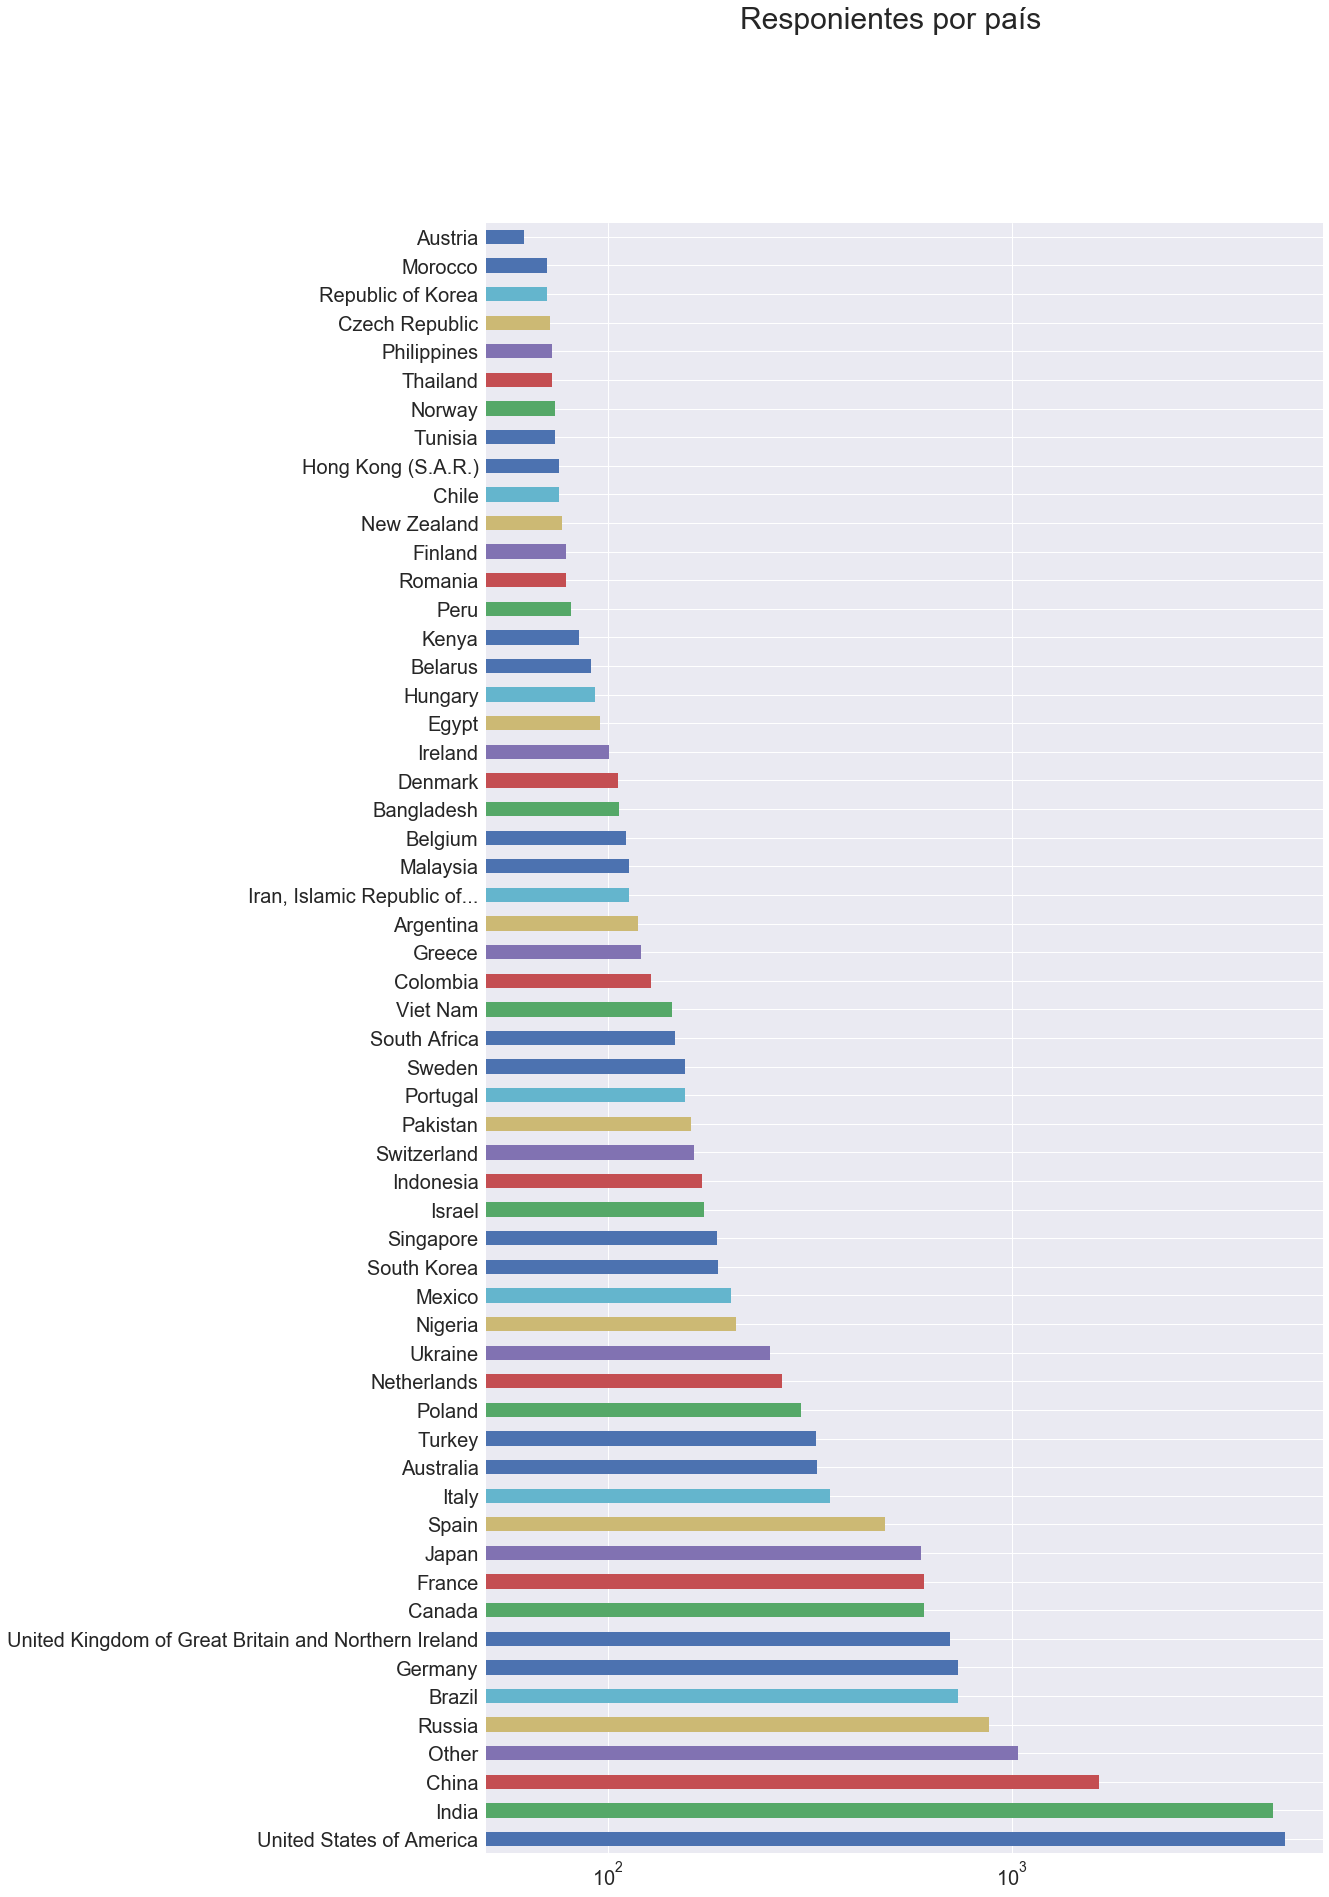

In [182]:
nacionalidades = data[keys[4]].values
nacionalidadesReal = nacionalidades.copy()[ii]
undisclosed = (nacionalidades == 'I do not wish to disclose my location')
nacionalidadesReal = nacionalidades[~undisclosed]
pd.Series(nacionalidadesReal).value_counts().plot("barh",figsize=(15,30),fontsize=20,logx=True)
plt.suptitle('Responientes por país',fontsize=30)

Text(0.5,0.98,'Trolls por país')

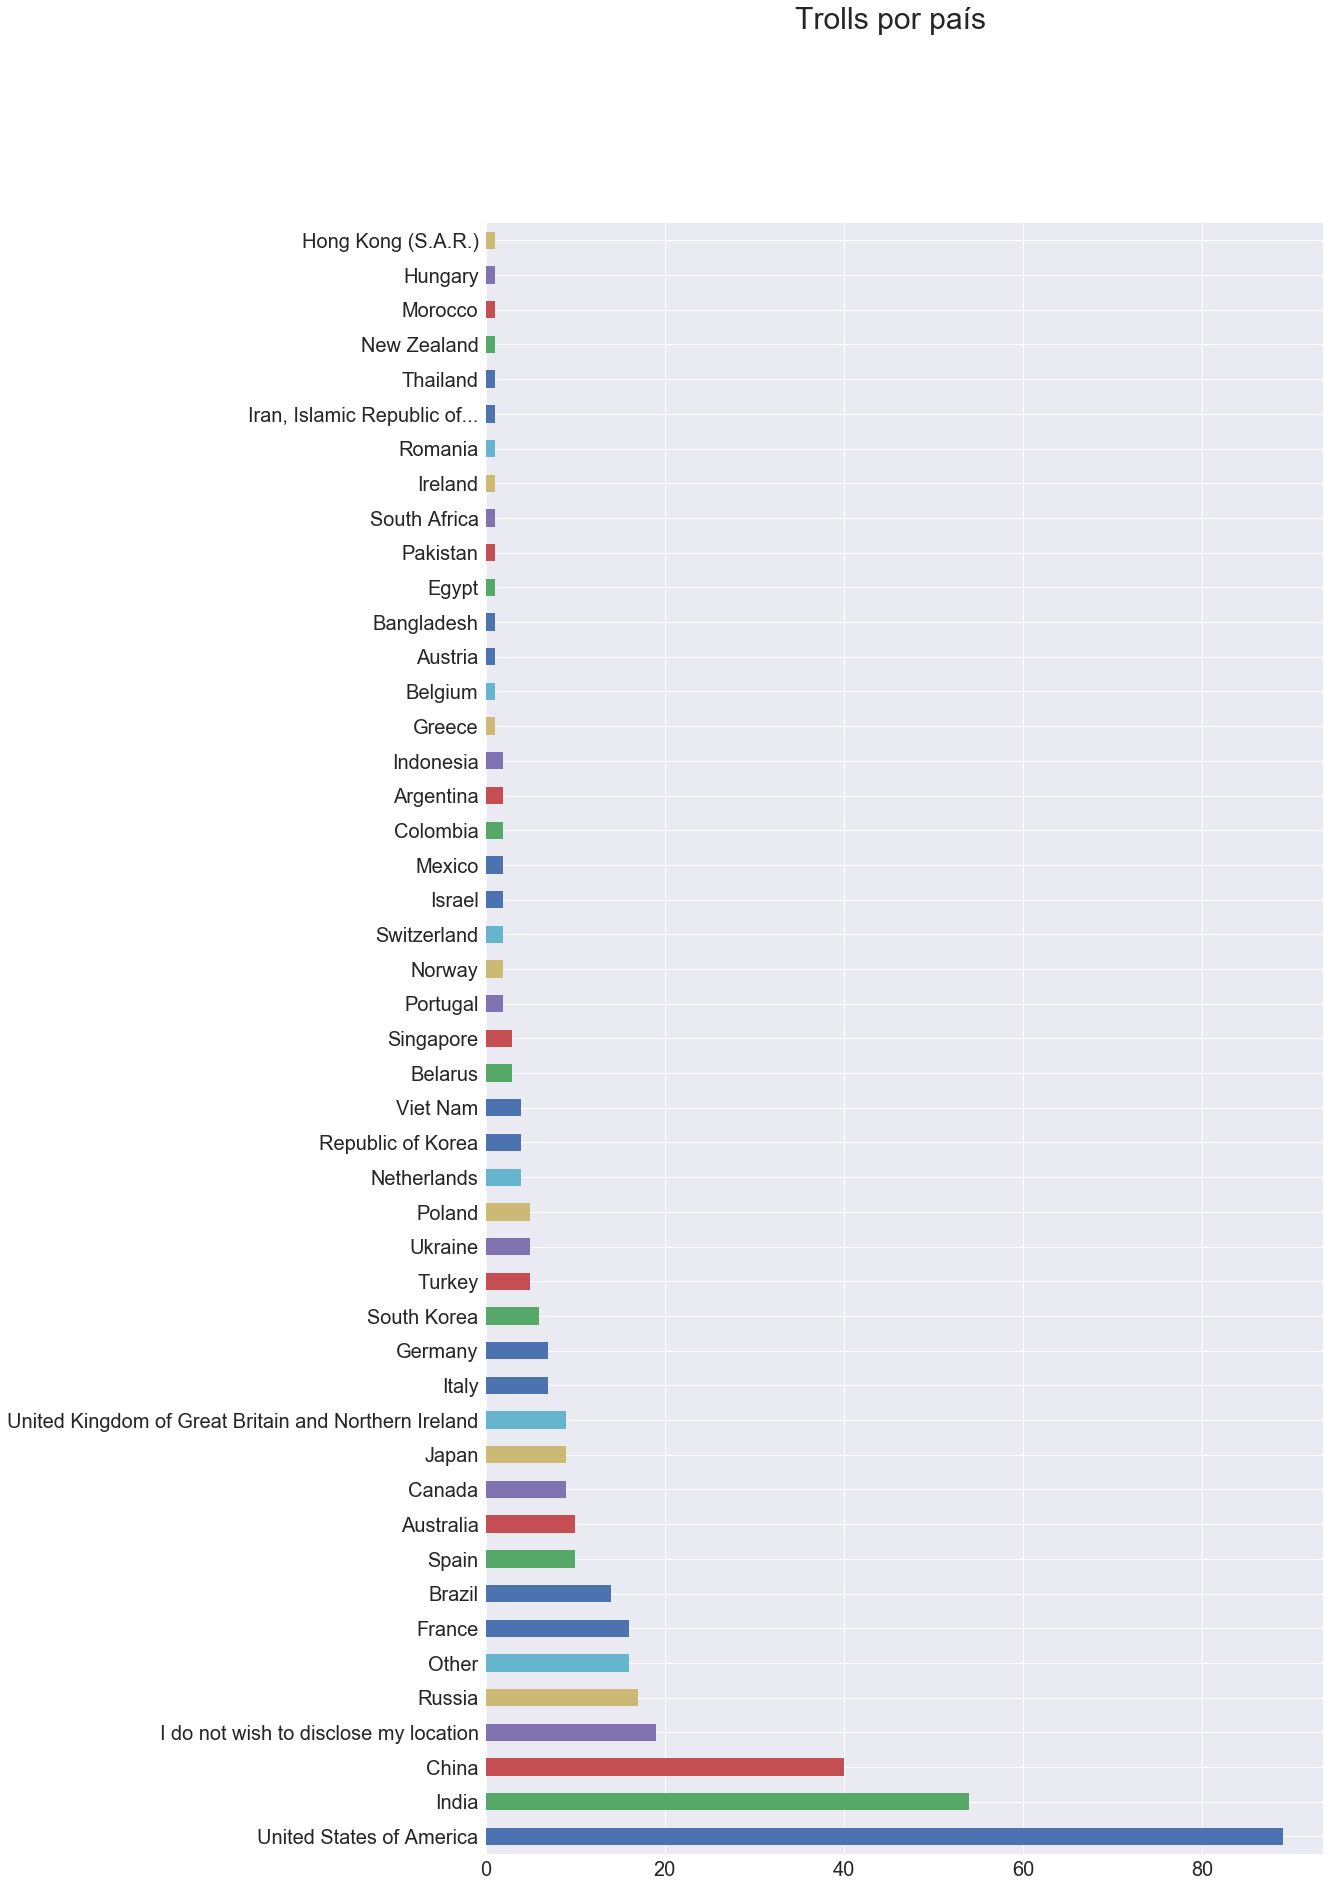

In [183]:
nacionalidadesIrreal = nacionalidades.copy()[~ii]
pd.Series(nacionalidadesIrreal).value_counts().plot("barh",figsize=(15,30),fontsize=20)
plt.suptitle('Trolls por país',fontsize=30)